In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('/Users/pabloalonsomedrano/Desktop/GDP/Dataset/ALLMvHc.csv')

In [3]:
data.drop('File', axis = 1, inplace = True)

In [4]:
X = data.drop('Jdp', axis=1) 
y = data['Jdp']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
# Create the model
model = keras.Sequential([
    #Input layer
    layers.InputLayer(input_shape=[3]),
    # hidden layer, activation function defines how the input is transformed into an output.
    layers.Dense(units = 10, activation='relu'),
    layers.Dense(units = 10, activation='relu'),
    layers.Dense(units = 10, activation='relu'),
    # Output layer
    layers.Dense(1),
])

2022-11-22 23:36:06.151584: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 23:36:06.153051: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [7]:
#we compile in the optimizer and loss function
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), #adam SGD algorithm that has an adaptive learning rate that makes it suitable for most problems.
    loss='mse', #mean absolute error
    
)

In [8]:
# model training
history = model.fit(
    X_train.values, y_train.values,
    validation_data=(X_test.values, y_test.values),
    batch_size= 50, # the rows of training data at a time
    epochs=200, # the number of times it goes all the way through the dataset
    verbose=0,  # turn off training log
)

Minimum validation loss: 0.03552646240673575


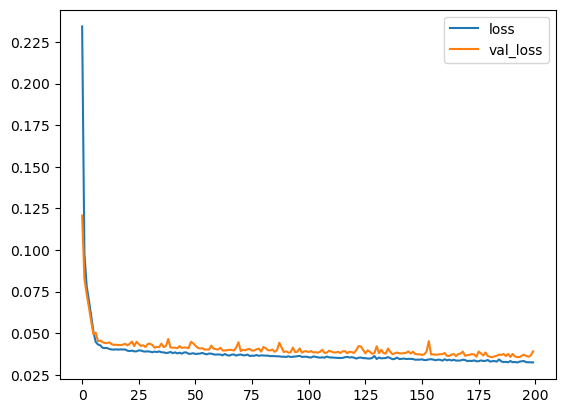

In [9]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [10]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
